In [1]:
!pip install pymysql

In [9]:
import pymysql

In [10]:
MYSQL_USER_DATA_SAVED_FILE = 'res/mysql/userinfo'

In [11]:
# 최초 한 번만 구동시키면 된다
# 본인 계정을 숨길 생각이라면 한번 사용 이후에 id, password를 지우도록 한다
import pickle

mysql_user_info = dict({
    'user_id' : 'MYSQL 계정',
    'password' : 'MYSQL 계정 비밀번호'
})

f = open(MYSQL_USER_DATA_SAVED_FILE, 'wb')
pickle.dump(mysql_user_info, f)
f.close()

del mysql_user_info

In [20]:
import pickle

f = open(MYSQL_USER_DATA_SAVED_FILE, 'rb')
mysql_user_info = pickle.load(f)
f.close()

In [13]:
db = pymysql.connect(
    # localhost와 같은 아이피 주소임
    host = '127.0.0.1',
    # MySQL의 포트번호
    port = 3306,
    # 아이디
    user = mysql_user_info['user_id'],
    # 비밀번호
    passwd = mysql_user_info['password'],
    # 사용하려는 스키마
    db = 'pydb'    
)

print(db)

In [14]:
# 이제 DB에서 select 등을 수행했을때
# 나오는 결과를 순회할 수 있도록 지원하는 객체를 가져온다.
cursor = db.cursor()

print(cursor)

In [16]:
# MySQL 수동 쿼리를 적용하여 table을 생성해보도록 한다.
sql = """
    create table pydbtest(
        id int unsigned not null auto_increment,
        name varchar(20) not null,
        price int not null,
        primary key(id)
    )
"""

# 실제 SQL Query를 실행하는 코드
cursor.execute(sql)

# 작업한 내용을 실제 DB에 적용함
db.commit()

# 작업 완료 이후 DB에 연결을 끊는다.
db.close()

print("테이블을 생성했습니다.")

테이블을 생성했습니다.


In [17]:
# insert 처리
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'    
)

cursor = db.cursor()

sql = """
    insert into pydbtest(name, price) values (%s, %s)
"""

# %s에 해당하는 데이터들을 배치한다.
cursor.execute(sql, ('Xeon Server', 10000000))
cursor.execute(sql, ('FPGA Server', 34000000))
cursor.execute(sql, ('GPU Server', 20000000))
cursor.execute(sql, ('RTX Server', 40000000))

db.commit()

db.close()

print("테이블에 값을 넣었습니다.")

테이블에 값을 넣었습니다.


In [19]:
# select (값 가져오기)
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'    
)

cursor = db.cursor()

sql = """
    select * from pydbtest;
"""

cursor.execute(sql)

# cursor를 통해 가져온 모든 데이터를 rows에 배치한다
rows = cursor.fetchall()
print(rows)

db.close()

print("데이터 값 불러오기")

((1, 'Xeon Server', 10000000), (2, 'FPGA Server', 34000000), (3, 'GPU Server', 20000000), (4, 'RTX Server', 40000000))
데이터 값 불러오기


In [21]:
# select (값 가져오기)
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'    
)

cursor = db.cursor()

sql = """
    select * from pydbtest;
"""

cursor.execute(sql)

# cursor를 통해 가져온 모든 데이터를 rows에 배치한다
rows = cursor.fetchall()

for row in rows:
    print(row)

db.close()

print("데이터 낱개로 불러오기")

(1, 'Xeon Server', 10000000)
(2, 'FPGA Server', 34000000)
(3, 'GPU Server', 20000000)
(4, 'RTX Server', 40000000)
데이터 낱개로 불러오기


In [25]:
# 낱개 내에서 각각의 데이터를 얻기(딕셔너리 형식이라 키값으로 뽑으면 됨)
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'    
)

# pymysql.cursors.DictCursor
cursor = db.cursor(pymysql.cursors.DictCursor)

sql = """
    select * from pydbtest;
"""

cursor.execute(sql)

# cursor를 통해 가져온 모든 데이터를 rows에 배치한다
rows = cursor.fetchall()

for row in rows:
    print('id: {0}, name: {1}, price: {2}'.format(row['id'], row['name'], row['price']))

db.close()

print("데이터 낱개로 불러와 특정값 추출하기")

id: 1, name: Xeon Server, price: 10000000
id: 2, name: FPGA Server, price: 34000000
id: 3, name: GPU Server, price: 20000000
id: 4, name: RTX Server, price: 40000000
데이터 낱개로 불러와 특정값 추출하기


In [26]:
# 입력한 데이터값 정리하기(테이블 삭제)
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'    
)

cursor = db.cursor()

sql = """
    drop table pydbtest;
"""

cursor.execute(sql)

db.commit()
db.close()

print("테이블을 삭제했습니다.")

테이블을 삭제했습니다.


In [27]:
# 소수점 데이터 처리하기
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'    
)

cursor = db.cursor()

sql = """
    create table power_data(
        no integer not null auto_increment primary key,
        voltage float not null,
        current float not null,
        vendor text null,
        name text not null,
        reg_date timestamp not null default now()
    )
"""

cursor.execute(sql)
db.commit()
db.close()

print("float 형식의 테이블을 생성했습니다.")

float 형식의 테이블을 생성했습니다.


In [28]:
import time
import math
import calendar
import datetime
# 파이썬에서 계산 편하게 도와주는것
import numpy as np

In [43]:
sample_time = np.arange(0, 10, 0.001)

print(sample_time)

[0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]


In [44]:
# 가우시안 분포(정규 분포) 형식을 따르는 랜덤을 만듦
# 용어 필요 없고 데이터 개수에 따른 랜덤을 적절하게 만들어줌(자연스럽게)
noise = np.random.normal(size = len(sample_time))

print(noise)

[ 0.82565841  0.65547595 -0.32795279 ...  1.98857009  0.20835737
  0.57048861]


In [45]:
# 소수점 데이터 만들어보기
voltage = 3 * np.cos(5 * sample_time) + noise
current = 3 * np.sin(3 * sample_time + (math.pi / 3)) + noise

print(voltage)
print(current)

[3.82565841 3.65543845 2.67189721 ... 4.87133608 3.09523959 3.4614149 ]
[ 3.42373463  3.25804046  2.2790766  ...  0.88213859 -0.88970364
 -0.519192  ]


In [35]:
!pip install matplotlib

In [46]:
# 나온 데이터를 바탕으로 그래프 그리기 
import matplotlib.pyplot as plt

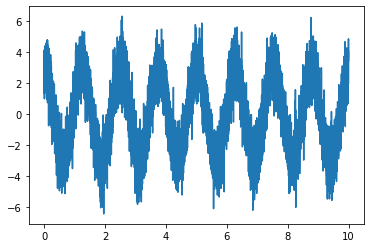

In [47]:
# ex_전기 사용 / 전기 요금
plt.plot(sample_time, voltage)
plt.show()

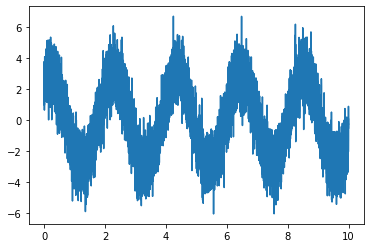

In [48]:
plt.plot(sample_time, current)
plt.show()

In [49]:
# time.gmtime() 현재 시간값을 컴퓨터가 계산하고 있는 수치로 가져옴
ts = calendar.timegm(time.gmtime())

print(ts)

# sample_time이 이미 1000개짜리 배열이므로
# 곱셈을 수행할 경우 알아서 1000개 배열에 1000씩 곱해짐(자동으로)
# 샘플 타임이 0.001초(1 / 1000 초)를 대상으로 하고 있음
# 전체 샘플 타임의 개수는 10000개(만개)이므로 1 / 1000 초 단위 샘플링을 하면
# 10000 / 1000 = 10초간의 데이터를 수집함을 의미함
ts = (sample_time * 1000) + ts

print(ts)

1633943530
[1.63394353e+09 1.63394353e+09 1.63394353e+09 ... 1.63395353e+09
 1.63395353e+09 1.63395353e+09]


In [50]:
# 실제 db에 넣기 위해 상호간의 데이터 타입을 np.float32로 맞춰줌(이것을 해줘야 DB에 입력 가능함)
sample_time = np.array(sample_time, dtype=np.float32)
voltage = np.array(voltage, dtype=np.float32)
current = np.array(voltage, dtype=np.float32)

In [51]:
curr_time = []

# datetime.datetime을 통해 시간값을 제어할 수 있으며
# datetime.datetime.fromtimestamp(컴퓨터시간).strft(형식)을 통해
# 원하는 형태로 시간을 형 변환할 수 있음
for i in range(len(sample_time)):
    curr_time.append(
        datetime.
            datetime.
                fromtimestamp(ts[i]).
                    strftime('%Y-%m-%d %H:%M:%S')
    )
    
print(curr_time)

['2021-10-11 18:12:10', '2021-10-11 18:12:11', '2021-10-11 18:12:12', '2021-10-11 18:12:13', '2021-10-11 18:12:14', '2021-10-11 18:12:15', '2021-10-11 18:12:16', '2021-10-11 18:12:17', '2021-10-11 18:12:18', '2021-10-11 18:12:19', '2021-10-11 18:12:20', '2021-10-11 18:12:21', '2021-10-11 18:12:22', '2021-10-11 18:12:23', '2021-10-11 18:12:24', '2021-10-11 18:12:25', '2021-10-11 18:12:26', '2021-10-11 18:12:27', '2021-10-11 18:12:28', '2021-10-11 18:12:29', '2021-10-11 18:12:30', '2021-10-11 18:12:31', '2021-10-11 18:12:32', '2021-10-11 18:12:33', '2021-10-11 18:12:34', '2021-10-11 18:12:35', '2021-10-11 18:12:36', '2021-10-11 18:12:37', '2021-10-11 18:12:38', '2021-10-11 18:12:39', '2021-10-11 18:12:40', '2021-10-11 18:12:41', '2021-10-11 18:12:42', '2021-10-11 18:12:43', '2021-10-11 18:12:44', '2021-10-11 18:12:45', '2021-10-11 18:12:46', '2021-10-11 18:12:47', '2021-10-11 18:12:48', '2021-10-11 18:12:49', '2021-10-11 18:12:50', '2021-10-11 18:12:51', '2021-10-11 18:12:52', '2021-10-1

In [52]:
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'    
)

cursor = db.cursor()

# 소수점 형식의 데이터와 현재 시간값을 기록하도록 한다.
sql = """
    insert into power_data(
        voltage, current, vendor, name, reg_date
    ) values(
        %s, %s, %s, %s, %s
    )
"""

# volt, curr이 np.float32
# DB에 넣는 과정은 %s(문자열) 형식이므로 반드시 str()로 한 번 감싸줘야 함
try:
    with db.cursor() as cursor:
        for i in range(len(sample_time)):
            cursor.execute(sql,
                (
                    str(voltage[i]),
                    str(current[i]),
                    'EDDI',
                    'P32N21BTN77PW',
                    curr_time[i]
                )
            )
            
        db.commit()
finally:
    db.close()
    
print('소수점 형식 데이터 및 날짜 형식 데이터 입력을 성공했습니다.')

소수점 형식 데이터 및 날짜 형식 데이터 입력을 성공했습니다.
